In [8]:
import pm4py
import pandas as pd

pd.options.display.max_rows = 0 #4000

In [9]:
log = pd.read_csv("ircc_uOttawa.csv")

/var/folders/b6/7128wh613rqcbppftg_0hb2h0000gn/T/ipykernel_36834/1794484339.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  log = pd.read_csv("ircc_uOttawa.csv")


# Data analysis

In [10]:
log

,Unnamed: 0,case_id,timestamp,act_upd_by,activity_id,group,cor,event,new_time
0,0,1,2024-06-03 00:00:00.000,CLIENT,0,NaN,Vietnam,Misrepresentation - NIL,1717372800
1,1,1,2024-06-03 00:00:00.000,CLIENT,0,NaN,Vietnam,Eligibility Assessment - NIL,1717372800
2,2,1,2024-06-03 00:00:00.000,CLIENT,0,NaN,Vietnam,Final Assessment - NIL,1717372800
3,3,1,2024-06-03 00:00:00.000,CLIENT,0,NaN,Vietnam,Received - Date,1717372800
4,4,1,2024-06-03 09:20:37.327,EAIMEL,1-SQ1RI5F,NaN,Vietnam,Application Status - Prospective,1717406437
5,5,1,2024-06-03 09:20:38.890,TL32860,1-SQ1RI5F,NaN,Vietnam,Biometric Assessment - Required,1717406438
6,6,1,2024-06-03 09:20:39.023,ST32611,1-SQ1RI7P,NaN,Vietnam,Criminality - Not Started,1717406439
7,7,1,2024-06-03 09:20:39.160,TL32860,1-SQ1RI5F,NaN,Vietnam,Criminality Assessment - Not Started,1717406439
8,8,1,2024-06-03 09:20:39.400,ST32611,1-SQ1RI7P,NaN,Vietnam,Criminality - In Progress,1717406439
...,...,...,...,...,...,...,...,...,...


In [4]:
from log_stats import get_relation_details, get_att_presence, get_trace_lengths, count_events, count_cases_per_event, filter_events_on_counts

In [5]:
get_relation_details('act_upd_by', 'activity_id', log, True)

964 (out of 1312) act_upd_by with many activity_id
17306 (out of 115131) activity_id with many act_upd_by
many-many


In [6]:
get_att_presence('activity_id', log)

total: 543283
unique: 115131
na: 127
not na: 543156


In [7]:
get_att_presence('act_upd_by', log)

total: 543283
unique: 1312
na: 0
not na: 543283


In [8]:
get_att_presence('event', log)

total: 543283
unique: 274
na: 0
not na: 543283


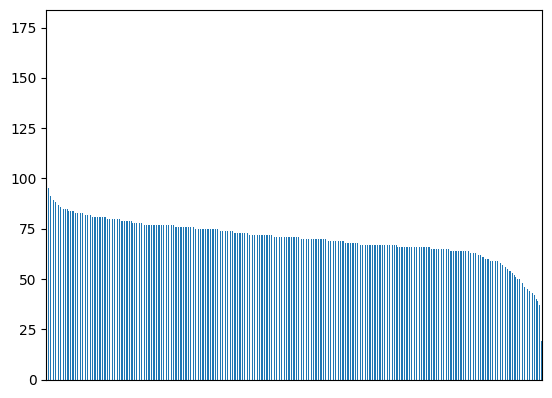

In [9]:
trace_lens = get_trace_lengths('event', 'case_id', log)

In [10]:
trace_lens.describe()

count    7734.000000
mean       70.246056
std        10.070505
min        13.000000
25%        66.000000
50%        71.000000
75%        77.000000
max       175.000000
Name: event, dtype: float64

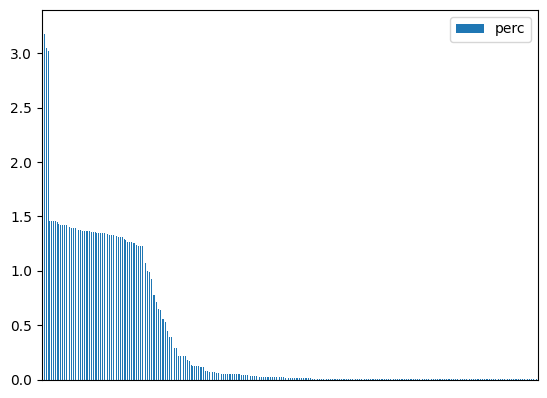

In [11]:
evts_counts = count_events('event', 'case_id', log)

,cases,perc
event,,
Application Status - Closed,7734,100.00000
Application Status - Prospective,7734,100.00000
Study Permit Fee - Outstanding,7734,100.00000
Application Status - Open,7734,100.00000
Eligibility Assessment - NIL,7729,99.93535
...,...,...
Non-compliance - Passed,1,0.01293
Note Review - Review Complete,1,0.01293
Open Work Permit Holder Fee Fee - Outstanding,1,0.01293


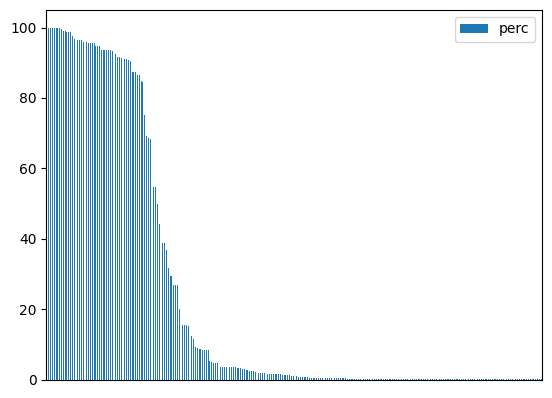

In [12]:
evts_cases_counts = count_cases_per_event('event', 'case_id', log)
evts_cases_counts

In [13]:
log2 = filter_events_on_counts('event', 10, evts_cases_counts, log)
log2

,Unnamed: 0,case_id,timestamp,act_upd_by,activity_id,group,cor,event,new_time
0,0,1,2024-06-03 00:00:00.000,CLIENT,0,NaN,Vietnam,Misrepresentation - NIL,1717372800
1,1,1,2024-06-03 00:00:00.000,CLIENT,0,NaN,Vietnam,Eligibility Assessment - NIL,1717372800
2,2,1,2024-06-03 00:00:00.000,CLIENT,0,NaN,Vietnam,Final Assessment - NIL,1717372800
3,3,1,2024-06-03 00:00:00.000,CLIENT,0,NaN,Vietnam,Received - Date,1717372800
4,4,1,2024-06-03 09:20:37.327,EAIMEL,1-SQ1RI5F,NaN,Vietnam,Application Status - Prospective,1717406437
...,...,...,...,...,...,...,...,...,...
543278,543278,7734,2024-06-17 07:46:39.433,SS36358,1-STC2A6X,NaN,Belgium,Other Reqs Assessment - NIL,1718610399
543279,543279,7734,2024-06-26 08:11:25.043,SS36358,1-STC2A6X,NaN,Belgium,Eligibility Assessment - Review Required,1719389485
543280,543280,7734,2024-06-28 10:45:09.050,SS36358,1-STC2A6X,NaN,Belgium,Eligibility Assessment - Failed,1719571509
543281,543281,7734,2024-06-28 10:45:09.587,SS36358,1-STC2A6X,NaN,Belgium,Final Assessment - Refused,1719571509


,cases,perc
event,,
Application Status - Closed,7734,100.000000
Application Status - Open,7734,100.000000
Study Permit Fee - Outstanding,7734,100.000000
Application Status - Prospective,7734,100.000000
Misrepresentation - NIL,7729,99.935350
...,...,...
Biometric - FCC - USA - Ready to be Assessed,1188,15.360745
Biometric - FCC - USA - Complete - Not Reviewed,1182,15.283165
Biometric - FCC Detail - USA - Ready to be Assessed,1181,15.270235


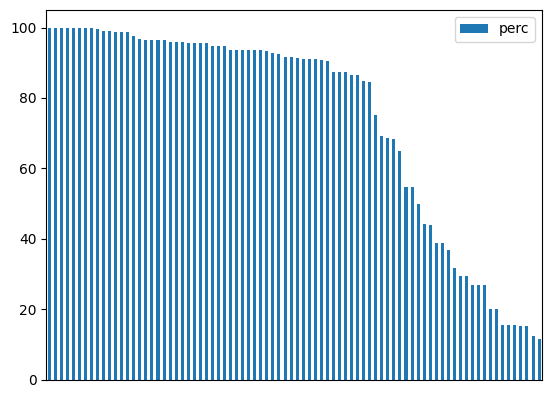

In [14]:
count_cases_per_event('event', 'case_id', log2)

In [15]:
get_trace_lengths('event', 'case_id', log2, plot=False).describe()

count    7734.000000
mean       67.968192
std        10.630615
min        11.000000
25%        65.000000
50%        69.000000
75%        75.000000
max       153.000000
Name: event, dtype: float64

In [16]:
log2.to_csv("ircc_uOttawa-filter_evt_10p.csv", index=False)

# Process Mining!

In [ ]:
log = log2

In [ ]:
log = log[['case_id', 'event', 'timestamp', 'act_upd_by', 'cor']]
log = log.rename(columns={ 'case_id' : 'case:concept:name', 'event': 'concept:name', 'timestamp': 'time:timestamp' })
log['case:concept:name'] = log['case:concept:name'].astype(str)
log['time:timestamp'] = pd.to_datetime(log['time:timestamp'])
log

In [ ]:
from variant_stats import get_variants, get_variants_stats, get_variant_coverage, get_covering_variants, filter_traces_on_variants

In [ ]:
variants = list(get_variants(log).keys())
variants[1]

In [ ]:
var_stats = get_variants_stats(log, unordered=False)
var_stats

In [ ]:
var_perc = get_variant_coverage(80, var_stats)
var_perc

In [ ]:
cov_var = get_covering_variants(80, var_stats)
cov_var.shape[0]

In [ ]:
from variant_stats import filter_traces_on_variants
filter_log = filter_traces_on_variants(log, cov_var)
filter_log

num_filter = len(filter_log['case:concept:name'].unique())
num_orig = len(log['case:concept:name'].unique())

# does it check out? (should be 80%)
print(int(num_orig * 0.8) == num_filter)

In [ ]:
unvar_stats = get_variants_stats(log, unordered=True)
unvar_stats

In [ ]:
unvar_perc = get_variant_coverage(80, unvar_stats)
unvar_perc

In [ ]:
cov_unvar = get_covering_variants(80, unvar_stats)
cov_unvar.shape[0]